__GOAL: Build a Handwritten Image Classifier Using Neural Networks with different number of Hidden Layers__

In [30]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()
digits.data.shape
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [31]:
data = pd.DataFrame(digits['data'])
labels = pd.Series(digits['target'])
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


__Need to reshape the image__ 

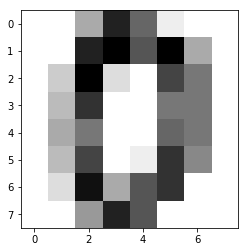

In [32]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

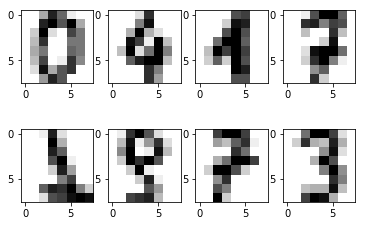

In [33]:
a, placement = plt.subplots(2, 4)

placement[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
placement[0, 1].imshow(data.iloc[100].values.reshape(8,8), cmap='gray_r')
placement[0, 2].imshow(data.iloc[200].values.reshape(8,8), cmap='gray_r')
placement[0, 3].imshow(data.iloc[300].values.reshape(8,8), cmap='gray_r')

placement[1, 0].imshow(data.iloc[1000].values.reshape(8,8), cmap='gray_r')
placement[1, 1].imshow(data.iloc[1100].values.reshape(8,8), cmap='gray_r')
placement[1, 2].imshow(data.iloc[1200].values.reshape(8,8), cmap='gray_r')
placement[1, 3].imshow(data.iloc[1300].values.reshape(8,8), cmap='gray_r')

__Testing Different Models__

1) Neural Network with 1 Hidden Layer

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

def train_nn(n_neurons, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=n_neurons)
    mlp.fit(train_features, train_labels)
    return mlp


def test_nn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return accuracy

def cross_validate(n_neurons):
    fold_accuracies = [] #prediction accuracies for all k=4 folds
    kf = KFold(n_splits = 4, random_state=1, shuffle =True) #split data in 4 parts. For each iteration, the selected fold is the test set, while the remaining (k-1) folds are the training set 
    for train_index, test_index in kf.split(data): #kf.split() gives the indices of the split data
        train_features = data.loc[train_index] 
        test_features = data.loc[test_index]
        train_labels = labels.loc[train_index]
        test_labels = labels.loc[test_index]
       
        model = train_nn(n_neurons, train_features, train_labels) #train nn
        accuracy = test_nn(model, test_features, test_labels) #obtain prediction accuracy for each fold
        fold_accuracies.append(accuracy) 
    return fold_accuracies

C:\Users\ace_n\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


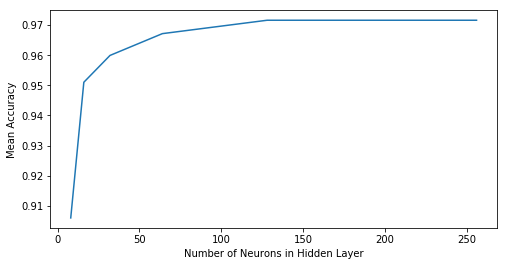

In [35]:
nn_one_neurons = [(8,),(16,),(32,),(64,),(128,),(256,)]
nn_one_accuracies = []

for n_neurons in nn_one_neurons:
    nn_accuracies = cross_validate(n_neurons)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

x = [i[0] for i in nn_one_neurons]
plt.figure(figsize=(8,4))
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Mean Accuracy')

plt.plot(x, nn_one_accuracies)

From the graph, an increase in the number of neurons caused a huge spike (85-93%) in the accuracy of the model but slows down heavily after 32 neurons are added. It looks like any value after 128 neurons does not cause anymore significant increase in the accuracy of the model and it maxes out at 97%.

2) Neural Network with 2 Hidden Layers

C:\Users\ace_n\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


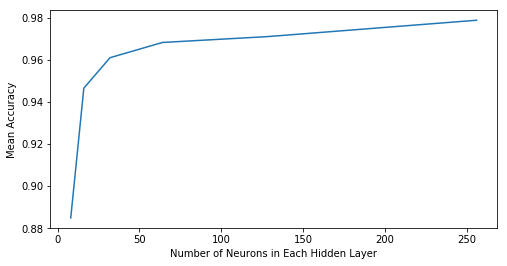

In [36]:
nn_two_neurons = [(8,8),(16,16),(32,32),(64,64),(128, 128),(256, 256)]
nn_two_accuracies = []

for n_neurons in nn_two_neurons:
    nn_accuracies = cross_validate(n_neurons)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

x = [i[0] for i in nn_two_neurons]    
plt.figure(figsize=(8,4))
plt.xlabel('Number of Neurons in Each Hidden Layer')
plt.ylabel('Mean Accuracy')

plt.plot(x, nn_two_accuracies)

Compared to the single layer, right of the bat, we can see that having 2 layers allows the mean accuracy to max out at 98% instead of 97%. Hence, adding an additional layer actually enabled an improvement in performance.

3) Neural Network with 3 Hidden Layers

C:\Users\ace_n\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


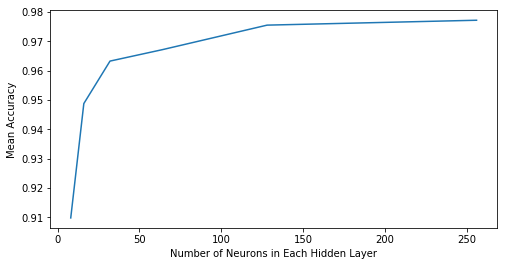

In [38]:
nn_three_neurons = [(8,8,8),(16,16,16),(32,32,32),(64,64,64),(128, 128,128),(256, 256,256)]
nn_three_accuracies = []

for n_neurons in nn_three_neurons:
    nn_accuracies = cross_validate(n_neurons)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

x = [i[0] for i in nn_three_neurons]
plt.figure(figsize=(8,4))
plt.xlabel('Number of Neurons in Each Hidden Layer')
plt.ylabel('Mean Accuracy')

plt.plot(x, nn_three_accuracies)

From this last graph (3 hidden layers), we can see that the mean accuracy maxes out at 98% just like the graph (with 2 hidden layers). However, this graph converges to 98% at a much faster rate than the previous 2.

__Conclusion__
Therefore, from this little experiment, we can conclude that a greater number of hidden layers as well as a greater number of neurons in each layer both result in a better prediction accuracy/model.